In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.patches as patches


In [3]:
!python  '/workspaces/predictive_maintenance/src/agg_telemetry.py'

In [4]:
df_failures_telemetry_path  = '../data/processed/training_data/df_failures_telemetry_agg.parquet'
df_failures_telemetry_agg = pd.read_parquet(df_failures_telemetry_path)

In [5]:
df_failures_telemetry_agg

,mean_volt,mean_rot,mean_press,mean_vib,max_volt,max_rot,max_press,max_vib,min_volt,min_rot,min_press,min_vib,std_volt,std_rot,std_press,std_vib,failure_binary,failure
id_falla,,,,,,,,,,,,,,,,,,
0,173.512576,452.935617,99.054810,49.790990,215.656488,568.972310,118.853452,66.764515,129.016707,365.213804,80.668287,32.323616,15.555953,40.671593,10.296823,7.119395,1,4
1,183.661398,449.538220,100.282446,40.630648,216.930340,578.744306,117.308568,49.029715,149.968203,354.540120,74.378060,31.619270,17.386720,50.097573,8.950703,4.914494,1,1
2,170.865475,407.779314,101.693723,39.377208,197.435885,613.356453,121.827141,50.877634,142.494330,279.695062,87.147429,27.341131,12.928877,69.037779,8.930414,4.809868,1,2
3,172.507370,468.114615,100.127784,44.054041,202.610866,581.811206,126.893326,61.150030,138.300867,381.047123,81.351236,29.443212,14.823837,43.322180,8.151996,7.352134,1,4
4,169.612581,444.854205,97.305352,45.345722,207.324122,586.839392,121.728619,58.889644,134.330585,345.711420,75.959631,31.851489,15.092239,46.893590,10.674456,6.876068,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,173.532724,448.671276,99.537533,42.390969,205.922866,568.509851,126.407444,59.390286,143.335705,316.985716,77.021908,30.759994,14.509493,47.420543,10.577554,7.510491,0,0
1307,170.158560,448.676714,98.946359,40.122680,195.085807,588.393263,116.231470,51.538254,146.760321,334.944901,78.444266,28.004941,11.989759,53.816370,8.843560,5.389516,0,0
1308,168.099439,458.887164,103.649632,38.894612,192.721200,582.129496,142.995348,49.574126,142.304519,370.144808,77.037310,25.687218,13.255926,43.798833,11.033122,5.755992,0,0


# Resultados clase 42 

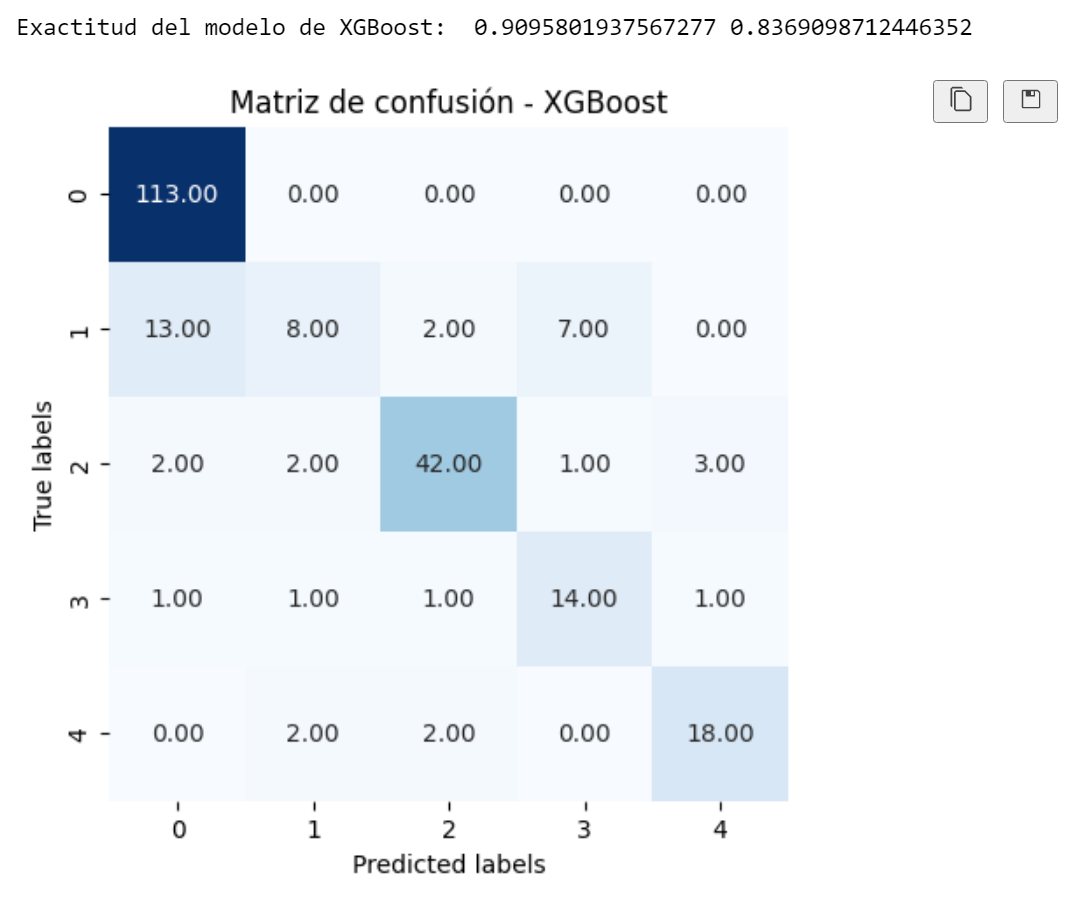


In [6]:
def train_xgboost(X_train, y_train):
    # Entrenar modelo de XGBoost
    xgb_model = xgb.XGBClassifier(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=0,alpha=0.5)
    xgb_model.fit(X_train, y_train)
    return xgb_model# 

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Calcular la exactitud en el conjunto de entrenamiento
    train_accuracy = model.score(X_train, y_train)

    # Realizar predicciones en los datos de prueba y calcular la exactitud y la matriz de confusión
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    return train_accuracy, test_accuracy, confusion

def plot_confusion_matrix(confusion, model_name):
    # Graficar matriz de confusión para un modelo dado
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion, annot=True, fmt='.2f', cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matriz de confusión - " + model_name)
    plt.show()


def plot_time_series_with_colored_segments(white_start, white_end, color1_start, color1_end, color2_start, color2_end, color1_hex, color2_hex, time_series_color, description1, description2,time_series_length=50):
    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Generate random time series data
    time_series_x = np.linspace(0, time_series_length-1, time_series_length)
    time_series_y = np.random.randn(time_series_length)

    # Plot the time series data
    ax.plot(time_series_x, time_series_y, color=time_series_color)

    # Set the x and y axis limits to fit the time series
    ax.set_xlim(white_start, time_series_length)
    ax.set_ylim(min(time_series_y) - 1, max(time_series_y) + 1)

    # Define the background rectangle parameters: y, height
    background_y = ax.get_ylim()[0]
    background_height = ax.get_ylim()[1] - ax.get_ylim()[0]

    # Create a white rectangle with the specified parameters
    white_width = white_end - white_start
    white_rectangle = patches.Rectangle((white_start, background_y), white_width, background_height, linewidth=0, facecolor='white', alpha=1)

    # Create a color1 rectangle with the specified parameters
    color1_width = color1_end - color1_start
    color1_rectangle = patches.Rectangle((color1_start, background_y), color1_width, background_height, linewidth=0, facecolor=color1_hex, alpha=0.5)

    # Create a color2 rectangle with the specified parameters
    color2_width = color2_end - color2_start
    color2_rectangle = patches.Rectangle((color2_start, background_y), color2_width, background_height, linewidth=0, facecolor=color2_hex, alpha=0.5)

    # Add the white, color1, and color2 rectangles to the axis
    ax.add_patch(white_rectangle)
    ax.add_patch(color1_rectangle)
    ax.add_patch(color2_rectangle)

    # Customize the plot aesthetics
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title('Time Series')
    ax.grid(True, linestyle='--', alpha=0.5)

    # Add a custom legend
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color=time_series_color, lw=2, label='Time Series'),
                       patches.Patch(facecolor=color1_hex, alpha=0.5, label=description1),
                       patches.Patch(facecolor=color2_hex, alpha=0.5, label=description2)]
    ax.legend(handles=legend_elements, loc='upper left')

    # Display the plot
    plt.show()


In [7]:
features = ['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
       'max_rot', 'max_press', 'max_vib', 'min_volt', 'min_rot', 'min_press',
       'min_vib', 'std_volt', 'std_rot', 'std_press', 'std_vib']



target = 'failure'



# Seleccionar características y variable objetivo
X = df_failures_telemetry_agg[features]
y = df_failures_telemetry_agg[target]

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = train_xgboost(X_train, y_train)
train_accuracyxgb, accuracyxgb, confusionxgb = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

Exactitud del modelo de XGBoost:  0.9179389312977099 0.870722433460076


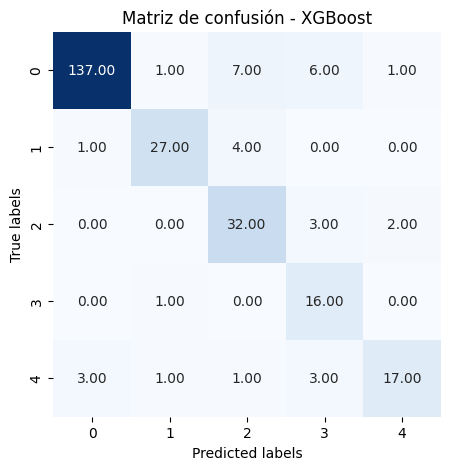

In [8]:
# evaluate_model xgb
print ("Exactitud del modelo de XGBoost: ",train_accuracyxgb,  accuracyxgb)
plot_confusion_matrix(confusionxgb, "XGBoost")



# dataset 

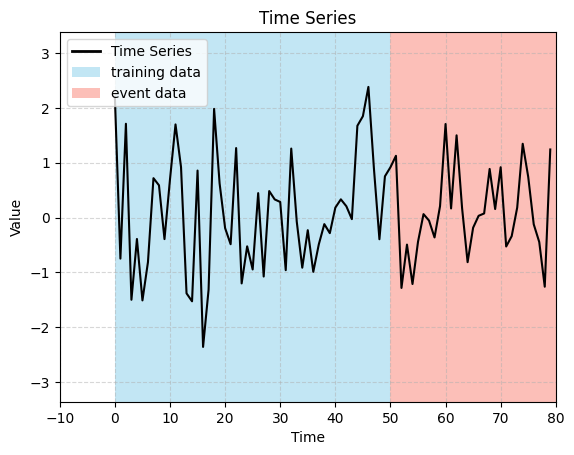

In [9]:




ventana_features = 80
ventana_falla = 30
n_samples = 1000 
 

color1_start = 0
color1_end = ventana_features  - ventana_falla 
color2_start = ventana_features  - ventana_falla
color2_end = ventana_features
# Call the function with specified segment parameters, hex color codes, and descriptions
plot_time_series_with_colored_segments(white_start=-10, white_end=0, color1_start=color1_start, color1_end=color1_end, color2_start=color2_start, color2_end=color2_end, color1_hex='#87CEEB', color2_hex='#fa8072', time_series_color='#000000', description1='training data', description2='event data',time_series_length=ventana_features)


In [10]:
df_failures_telemetry_agg

,mean_volt,mean_rot,mean_press,mean_vib,max_volt,max_rot,max_press,max_vib,min_volt,min_rot,min_press,min_vib,std_volt,std_rot,std_press,std_vib,failure_binary,failure
id_falla,,,,,,,,,,,,,,,,,,
0,173.512576,452.935617,99.054810,49.790990,215.656488,568.972310,118.853452,66.764515,129.016707,365.213804,80.668287,32.323616,15.555953,40.671593,10.296823,7.119395,1,4
1,183.661398,449.538220,100.282446,40.630648,216.930340,578.744306,117.308568,49.029715,149.968203,354.540120,74.378060,31.619270,17.386720,50.097573,8.950703,4.914494,1,1
2,170.865475,407.779314,101.693723,39.377208,197.435885,613.356453,121.827141,50.877634,142.494330,279.695062,87.147429,27.341131,12.928877,69.037779,8.930414,4.809868,1,2
3,172.507370,468.114615,100.127784,44.054041,202.610866,581.811206,126.893326,61.150030,138.300867,381.047123,81.351236,29.443212,14.823837,43.322180,8.151996,7.352134,1,4
4,169.612581,444.854205,97.305352,45.345722,207.324122,586.839392,121.728619,58.889644,134.330585,345.711420,75.959631,31.851489,15.092239,46.893590,10.674456,6.876068,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,173.532724,448.671276,99.537533,42.390969,205.922866,568.509851,126.407444,59.390286,143.335705,316.985716,77.021908,30.759994,14.509493,47.420543,10.577554,7.510491,0,0
1307,170.158560,448.676714,98.946359,40.122680,195.085807,588.393263,116.231470,51.538254,146.760321,334.944901,78.444266,28.004941,11.989759,53.816370,8.843560,5.389516,0,0
1308,168.099439,458.887164,103.649632,38.894612,192.721200,582.129496,142.995348,49.574126,142.304519,370.144808,77.037310,25.687218,13.255926,43.798833,11.033122,5.755992,0,0


In [13]:
features = ['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
       'max_rot', 'max_press', 'max_vib', 'min_volt', 'min_rot', 'min_press',
       'min_vib', 'std_volt', 'std_rot', 'std_press', 'std_vib']

target = 'failure_binary'

# Seleccionar características y variable objetivo
X = df_failures_telemetry_agg[features]
y = df_failures_telemetry_agg[target]

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = train_xgboost(X_train, y_train)
train_accuracyxgb, accuracyxgb, confusionxgb = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

Exactitud del modelo de XGBoost:  0.9312977099236641 0.9239543726235742


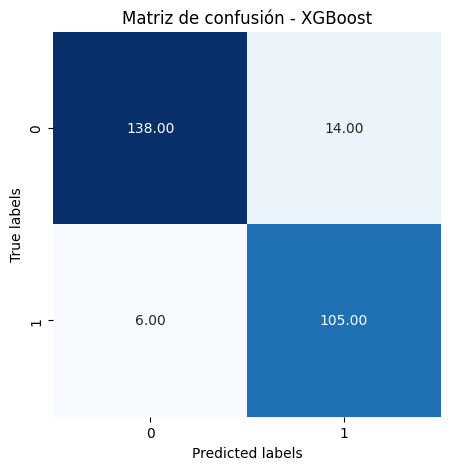

In [14]:
# evaluate_model xgb
print ("Exactitud del modelo de XGBoost: ",train_accuracyxgb,  accuracyxgb)
plot_confusion_matrix(confusionxgb, "XGBoost")

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

In [19]:
y_scores = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

print (fpr[0:10])
print (tpr[0:10])
print (thresholds[0:10])


[0.         0.         0.         0.         0.         0.
 0.01973684 0.01973684 0.01973684 0.01973684]
[0.         0.01801802 0.04504505 0.0990991  0.12612613 0.13513514
 0.23423423 0.25225225 0.27027027 0.30630631]
[1.9067354  0.90673536 0.9049341  0.8773536  0.85829765 0.8581135
 0.8559333  0.8453027  0.8449776  0.82941574]


AUC: 0.948


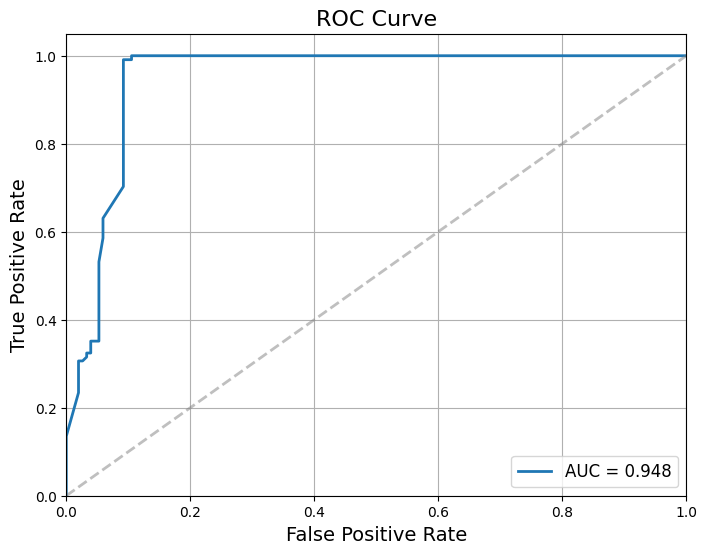

In [20]:
# Calculate the AUC score
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.3f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

fprndarray of shape (>2,)
Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

tprndarray of shape (>2,)
Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

thresholdsndarray of shape = (n_thresholds,)

Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

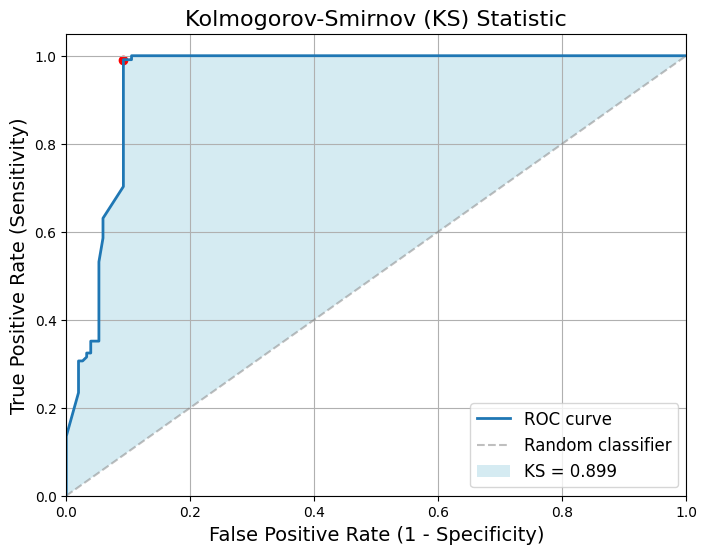

In [52]:

fpr, tpr, th = roc_curve(y_test, y_scores)
# Calculate the KS statistic
ks = np.max(tpr - fpr)
ks_index = np.argmax(tpr - fpr)
# Plot the KS statistic
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve', linewidth=2)
plt.plot(fpr, fpr, linestyle='--', color='gray', alpha=0.5, label='Random classifier')
plt.fill_between(fpr, tpr, fpr, where=(tpr >= fpr), facecolor='lightblue', alpha=0.5, label=f"KS = {ks:.3f}")
plt.scatter(fpr[ks_index], tpr[ks_index], marker='o', color='red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('Kolmogorov-Smirnov (KS) Statistic', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


In [57]:
print (f'True positive rate {tpr[1:10]}' )
print (f'False positive rate {fpr[1:10]}' )
print (f'th {th[1:10]}' )



True positive rate [0.01801802 0.04504505 0.0990991  0.12612613 0.13513514 0.23423423
 0.25225225 0.27027027 0.30630631]
False positive rate [0.         0.         0.         0.         0.         0.01973684
 0.01973684 0.01973684 0.01973684]
th [0.90673536 0.9049341  0.8773536  0.85829765 0.8581135  0.8559333
 0.8453027  0.8449776  0.82941574]


Bad pipe message: %s [b'\xd0\x86\x94\x99\xf7\x05^\xcf\xf6\x8d\x0e\x19*|\x83\xec\xacp \xc0uL\xa2\xa2\xf28\xb3,E\xde\x8cUp\xdaS\xf8\xfah\xc1\xe0Y\x82\xc1\x8a\x07s\x14\xd3\x98\x08)\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08']
Bad pipe message: %s [b'\n\x08\x0b\x08\x04\x08\x05\x08']
Bad pipe message: %s [b'\x01\x05\x01\x06\x01']
Bad pipe message: %s [b"\xbb\x14B5\x1b'\r\xf5J\xfaS\xa6\xf7\xa2\x06\x98\xcf\xea \xa2;0\xf8\xc8\x9a.>x\xc5\x10\x11\xfa\xb7P\xe3F>\xcd\x8c\x8d\xb6\x7f\xcb\xcc\x93^\xc9\xcf\xf4\x8bi\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00

In [54]:
print (f'True positive rate {tpr[ks_index]}' )
print (f'False positive rate {fpr[ks_index]}' )
print (f'TH rate {th[ks_index]}' )

True positive rate 0.990990990990991
False positive rate 0.09210526315789473
TH rate 0.4504019618034363


In [22]:
import scikitplot as skplt

<AxesSubplot: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

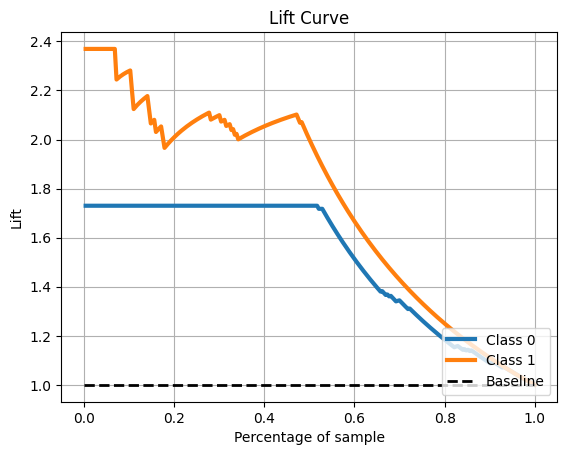

In [39]:

y_scores_2d = np.column_stack((1 - y_scores, y_scores))
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas=y_scores_2d)

In [15]:
def train_xgboost(X_train, y_train):
    # Entrenar modelo de XGBoost
    xgb_model = xgb.XGBClassifier(n_estimators=20,
                                   learning_rate=0.1, max_depth=3, 
                                   eval_metric= 'aucpr',
                                   random_state=0,alpha=0.5)
    xgb_model.fit(X_train, y_train)
    return xgb_model# 

# logloss  aucpr 
train_xgboost(X_train, y_train)

XGBClassifier(alpha=0.5, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [16]:
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [17]:
# lift and gain 
# https://towardsdatascience.com/evaluate-model-performance-with-cumulative-gains-and-lift-curves-1f3f8f79da01